# 목표
- **0.897 넘기기 (10%(66등) 안에 들기)**





# 데이터 준비 및 결측값 확인

In [ ]:
import numpy as np
import pandas as pd

# 데이터 경로
data_path = '/content/'

train = pd.read_csv(data_path + 'train.csv',index_col='id')
test = pd.read_csv(data_path + 'test.csv',index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv',index_col='id')

- 모델 성능 향상 데이터 추가
- https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [ ]:
# 다운받아서 불러옴
ibm = pd.read_csv(data_path + 'WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [ ]:
train.shape, test.shape, submission.shape, ibm.shape

((1677, 34), (1119, 33), (1119, 1), (1470, 35))

In [ ]:
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [ ]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# ibm 피쳐 개수가 많아 보임 (전처리 수행)
ibm['Attrition'] = (ibm['Attrition'] == 'Yes').astype(np.int64)

ibm.drop(columns="EmployeeNumber", inplace=True)

ibm = ibm[list(train.columns)]

In [ ]:
# train + ibm 
train = pd.concat([train, ibm]).reset_index(drop=True)
len(train)

3147

In [ ]:
# 학습데이터 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       3147 non-null   int64 
 1   BusinessTravel            3147 non-null   object
 2   DailyRate                 3147 non-null   int64 
 3   Department                3147 non-null   object
 4   DistanceFromHome          3147 non-null   int64 
 5   Education                 3147 non-null   int64 
 6   EducationField            3147 non-null   object
 7   EmployeeCount             3147 non-null   int64 
 8   EnvironmentSatisfaction   3147 non-null   int64 
 9   Gender                    3147 non-null   object
 10  HourlyRate                3147 non-null   int64 
 11  JobInvolvement            3147 non-null   int64 
 12  JobLevel                  3147 non-null   int64 
 13  JobRole                   3147 non-null   object
 14  JobSatisfaction         

In [ ]:
# 테스트데이터 정보
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 1677 to 2795
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1119 non-null   int64 
 1   BusinessTravel            1119 non-null   object
 2   DailyRate                 1119 non-null   int64 
 3   Department                1119 non-null   object
 4   DistanceFromHome          1119 non-null   int64 
 5   Education                 1119 non-null   int64 
 6   EducationField            1119 non-null   object
 7   EmployeeCount             1119 non-null   int64 
 8   EnvironmentSatisfaction   1119 non-null   int64 
 9   Gender                    1119 non-null   object
 10  HourlyRate                1119 non-null   int64 
 11  JobInvolvement            1119 non-null   int64 
 12  JobLevel                  1119 non-null   int64 
 13  JobRole                   1119 non-null   object
 14  JobSatisfaction      

In [ ]:
train.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,80,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,80,1,4,3,3,4,2,0,3,0


In [ ]:
test.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,
1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,...,4,80,0,1,2,2,1,0,0,0
1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,...,3,80,1,7,3,3,2,2,2,2


In [ ]:
def summary_feature_info(train=train, test=test):
    '''
    # 피쳐 요약 정보 생성하는 함수 구성
    # 전체 데이터 : 볼륨(형상) -> print()
    # 피쳐별 : 피쳐명, 타입, 결측치수, 고유값수, 고유값(top10) => DF로 구성 출력
    # 피쳐를 파악해 보겠다.
    '''
    try :
        sum_df = pd.DataFrame(train.dtypes, columns=['type'])
        # 인덱스 -> 컬럼으로 이동
        sum_df = sum_df.reset_index()
        # 컬렴명 index -> feature_name 변경
        sum_df.rename(columns={'index':'feature_name'}, inplace=True)

        # 결측치수
        sum_df['결측값수'] = train.isnull().sum().values

        # 고유값수
        sum_df['고유값수'] = train.nunique().values

        # 고유값(top10)
        sum_df['top10_values_train'] = sum_df['feature_name'].map(lambda d: train[d].value_counts().index[:10].tolist())
        sum_df['top10_values_test'] = sum_df['feature_name'].map(lambda d: test[d].value_counts().index[:10].tolist())
    except :
        sum_df['top10_values_test'] = sum_df['feature_name'][:-1].map(lambda d: test[d].value_counts().index[:10].tolist())


    return sum_df
summary_df = summary_feature_info(train)
summary_df

# 결측치가 있는 피처는 없음

,feature_name,type,결측값수,고유값수,top10_values_train,top10_values_test
0,Age,int64,0,43,"[34, 36, 35, 29, 31, 38, 40, 30, 32, 27]","[34, 35, 36, 38, 31, 40, 32, 29, 30, 28]"
1,BusinessTravel,object,0,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]","[Travel_Rarely, Travel_Frequently, Non-Travel]"
2,DailyRate,int64,0,901,"[1082, 775, 1329, 465, 827, 855, 1157, 1283, 5...","[688, 589, 1329, 658, 1490, 906, 691, 604, 114..."
3,Department,object,0,3,"[Research & Development, Sales, Human Resources]","[Research & Development, Sales, Human Resources]"
4,DistanceFromHome,int64,0,29,"[2, 1, 9, 10, 8, 3, 7, 5, 6, 4]","[1, 2, 10, 9, 7, 3, 5, 8, 4, 6]"
5,Education,int64,0,6,"[3, 4, 2, 1, 5, 15]","[3, 4, 2, 1, 5]"
6,EducationField,object,0,6,"[Life Sciences, Medical, Marketing, Technical ...","[Life Sciences, Medical, Marketing, Technical ..."
7,EmployeeCount,int64,0,1,[1],[1]
8,EnvironmentSatisfaction,int64,0,4,"[4, 3, 2, 1]","[4, 3, 1, 2, 0]"
9,Gender,object,0,2,"[Male, Female]","[Male, Female]"


In [ ]:
# 고유값 1개 피처 삭제
train.drop(columns=['Over18', 'EmployeeCount', 'StandardHours'], inplace=True, errors='ignore')
test.drop(columns=['Over18', 'EmployeeCount', 'StandardHours'], inplace=True, errors='ignore')

In [ ]:
train.shape, test.shape

((3147, 31), (1119, 30))

In [ ]:
def summary_feature_info(train=train):
  '''
    # 피쳐 요약 정보 생성하는 함수 구성
    # 전체 데이터 : 볼륨(형상) -> print()
    # 피쳐별 : 피쳐명, 타입, 결측치수, 고유값수, 샘플값 0~2(0,1,2개) => DF로 구성 출력
    # 피쳐를 파악해 보겠다.
  '''
  sum_df = pd.DataFrame(train.dtypes, columns=['type'])
  # 인덱스 -> 컬럼으로 이동
  sum_df = sum_df.reset_index()
  # 컬렴명 index -> feature_name 변경
  sum_df.rename(columns={'index':'feature_name'}, inplace=True)

  # 결측값
  sum_df['결측값수'] = train.isnull().sum().values

  # 고유값
  sum_df['고유값수'] = train.nunique().values

  # 샘플값 0~2(0,1,2개 정도)
  sum_df['샘플값 0'] = train.loc[0].values
  sum_df['샘플값 1'] = train.loc[1].values
  sum_df['샘플값 2'] = train.loc[2].values

  return sum_df
summary_df = summary_feature_info(train)
summary_df

,feature_name,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
0,Age,int64,0,43,36,35,32
1,BusinessTravel,object,0,3,Travel_Frequently,Travel_Rarely,Travel_Rarely
2,DailyRate,int64,0,901,599,921,718
3,Department,object,0,3,Research & Development,Sales,Sales
4,DistanceFromHome,int64,0,29,24,8,26
5,Education,int64,0,6,3,3,3
6,EducationField,object,0,6,Medical,Other,Marketing
7,EnvironmentSatisfaction,int64,0,4,4,1,3
8,Gender,object,0,2,Male,Male,Male
9,HourlyRate,int64,0,71,42,46,80


# EDA 및 피처엔지니어링

- 이진형
    - 'Gender', ~'Over18'~,
       'OverTime', 'PerformanceRating'

- 명목형
    - 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'

- 순서형 
    - 'EnvironmentSatisfaction', 'JobSatisfaction', 'JobLevel', 'RelationshipSatisfaction', 'StockOptionLevel', 'JobInvolvement', 'WorkLifeBalance'

- 수치형
    - 'Age', 'DailyRate', 'DistanceFromHome', 'Education', ~'EmployeeCount'~, 
    - 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    - 'HourlyRate', 
    - 'PercentSalaryHike', ~'StandardHours'~, 
       'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'


- 정답
    - 'Attrition' (0, 1)


## 이진형 데이터

In [ ]:
bin_datas = ['OverTime', 'Gender', 'PerformanceRating']

train[bin_datas].head(5)

,OverTime,Gender,PerformanceRating
0,Yes,Male,3
1,No,Male,3
2,No,Male,3
3,No,Female,3
4,Yes,Female,3


In [ ]:
summary_feature_info(train[bin_datas])

,feature_name,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
0,OverTime,object,0,2,Yes,No,No
1,Gender,object,0,2,Male,Male,Male
2,PerformanceRating,int64,0,2,3,3,3


### 이진형 시각화

타겟값 간 비율 6.20137299771167


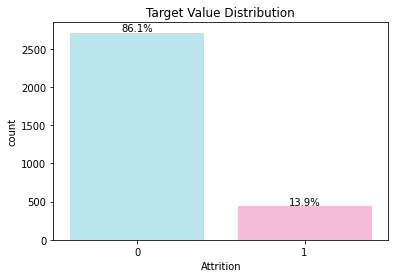

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 향후 시각화 자료에 비율을 표기하는 부분을 추가 => 텍스트 드로잉
def show_text_perent_by_target(ax, total_count, is_show = True,  ):
  '''
    is_show : True일 때만 텍스트가 노출되게 처리
    ax : 텍스트를 그리고자 하는 차트의 축정보
    total_count : 전체 카운트 수
  '''
  persents = list() # 비율을 담는 그릇
  # 카운트 플롯 차트상에 개별 박스 정보를 구하는 방법 -> ax.patches

  # 카운트 플롯 차트상에서 순차적으로 박스를 하나씩 추출한다.
  for patch in ax.patches: # 차트상에 존재하는 모든 형태의 도형을 차례대로 추출하는 연속형 변수
    w = patch.get_width() # 타겟값 0 혹은 1, 카운트 플롯의 개별 박스 넓이
    h = patch.get_height() # 타겟값 0 혹은 1의 카운트 수 -> 카운트 플롯의 개별 박스 높이 -> 카운트
    p = h / total_count * 100 # 타겟값의 비율 (개별박스의 높이(카운트) / 전체카운트) * 100

    persents.append(p)
    # 텍스트 그리기
    # 좌표 정보 획득
    l = patch.get_x() # 도형 왼쪽 테두리 X축의 기준 위치값

    ax.text(
        x = l + w/2, # 도형의 정 가운데를 x축 좌표 
        y = h + total_count * 0.005, # total_count(가변값)의 특정 비율로 올려서 위치를 조정
        s = f'{p:1.1f}%', # 타겟값의 비율을 개별 차트 내 도형 위에 그려지는 내용 ex ) 38.8%
        ha = 'center' # 정렬(가운데)
    )
  if is_show : 
      if len(persents) == 2: # 타겟용
        print('타겟값 간 비율',persents[0]/persents[1])
      elif len(persents) == 4: # 이진 피쳐용
        #print(persents)
        # 타겟값에 맞춰서 도형이 그려진다. 0번 타겟이 먼저 그려지고, 1번 타겟이 나중에 그려진다.
        print(persents[0]/persents[2], persents[1]/persents[3])
  pass

ax = sns.countplot(data=train, x='Attrition', palette=['#B2EBF4',"#FFB2D9"]);
show_text_perent_by_target(ax, train.shape[0])
ax.set_title('Target Value Distribution');

2.795348837209303 9.5


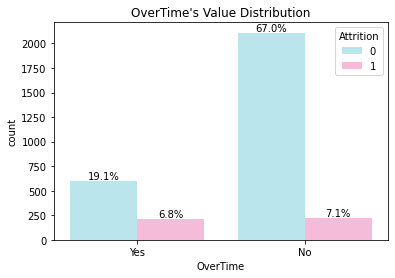

5.756944444444444 7.060402684563758


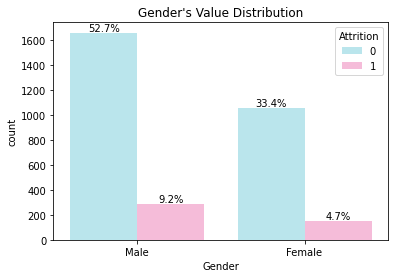

6.276881720430108 5.769230769230769


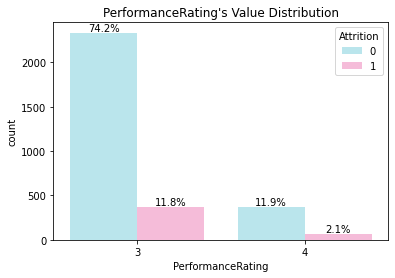

In [ ]:
train[bin_datas]

for bin_feature in train[bin_datas] : 
  ax = sns.countplot(data=train, x=bin_feature, hue='Attrition', palette=['#B2EBF4',"#FFB2D9"]);
  show_text_perent_by_target(ax, train.shape[0])
  ax.set_title(f'{bin_feature}\'s Value Distribution');
  plt.show()

### 시각화 분석 결과

- 불균형 데이터이다.
- OverTime 즉, 초과근무를 하지 않는 사람들은 초과근무를 하는 사람들에 비해 퇴사율이 높은 것을 알 수 있다.
- 남성과 여성의 경우 남성의 경우가 조직을 더 많이 떠나는 경향을 가지고 있다.
- 일의 능률이 낮은 사람이 더 높은 퇴사율을 가지고 있다.
- 이진형 분류는 0과 1로 바꿔주면 크게 문제 없이 진행될 것 같다.

## 명목형 데이터

In [ ]:
nom_datas = ['BusinessTravel', 'Department', 'MaritalStatus', 'EducationField', 'JobRole']

train[nom_datas].head(5)

,BusinessTravel,Department,MaritalStatus,EducationField,JobRole
0,Travel_Frequently,Research & Development,Married,Medical,Laboratory Technician
1,Travel_Rarely,Sales,Married,Other,Sales Representative
2,Travel_Rarely,Sales,Divorced,Marketing,Sales Executive
3,Travel_Rarely,Research & Development,Married,Medical,Healthcare Representative
4,Travel_Rarely,Research & Development,Single,Medical,Manager


In [ ]:
summary_feature_info(train[nom_datas])

,feature_name,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
0,BusinessTravel,object,0,3,Travel_Frequently,Travel_Rarely,Travel_Rarely
1,Department,object,0,3,Research & Development,Sales,Sales
2,MaritalStatus,object,0,3,Married,Married,Divorced
3,EducationField,object,0,6,Medical,Other,Marketing
4,JobRole,object,0,9,Laboratory Technician,Sales Representative,Sales Executive


### 명목형 피쳐 시각화

In [ ]:
def make_cross_tab(df, feature_name):
  cross_tab = pd.crosstab(df[feature_name], df['Attrition'], normalize='index') * 100
  cross_tab.reset_index(inplace=True)
  return cross_tab

def show_pointplot(feature, cross_tab, color, ax=None):
  sns.pointplot(x=feature, y=1, data=cross_tab, order=cross_tab[feature], color=color, ax=ax);

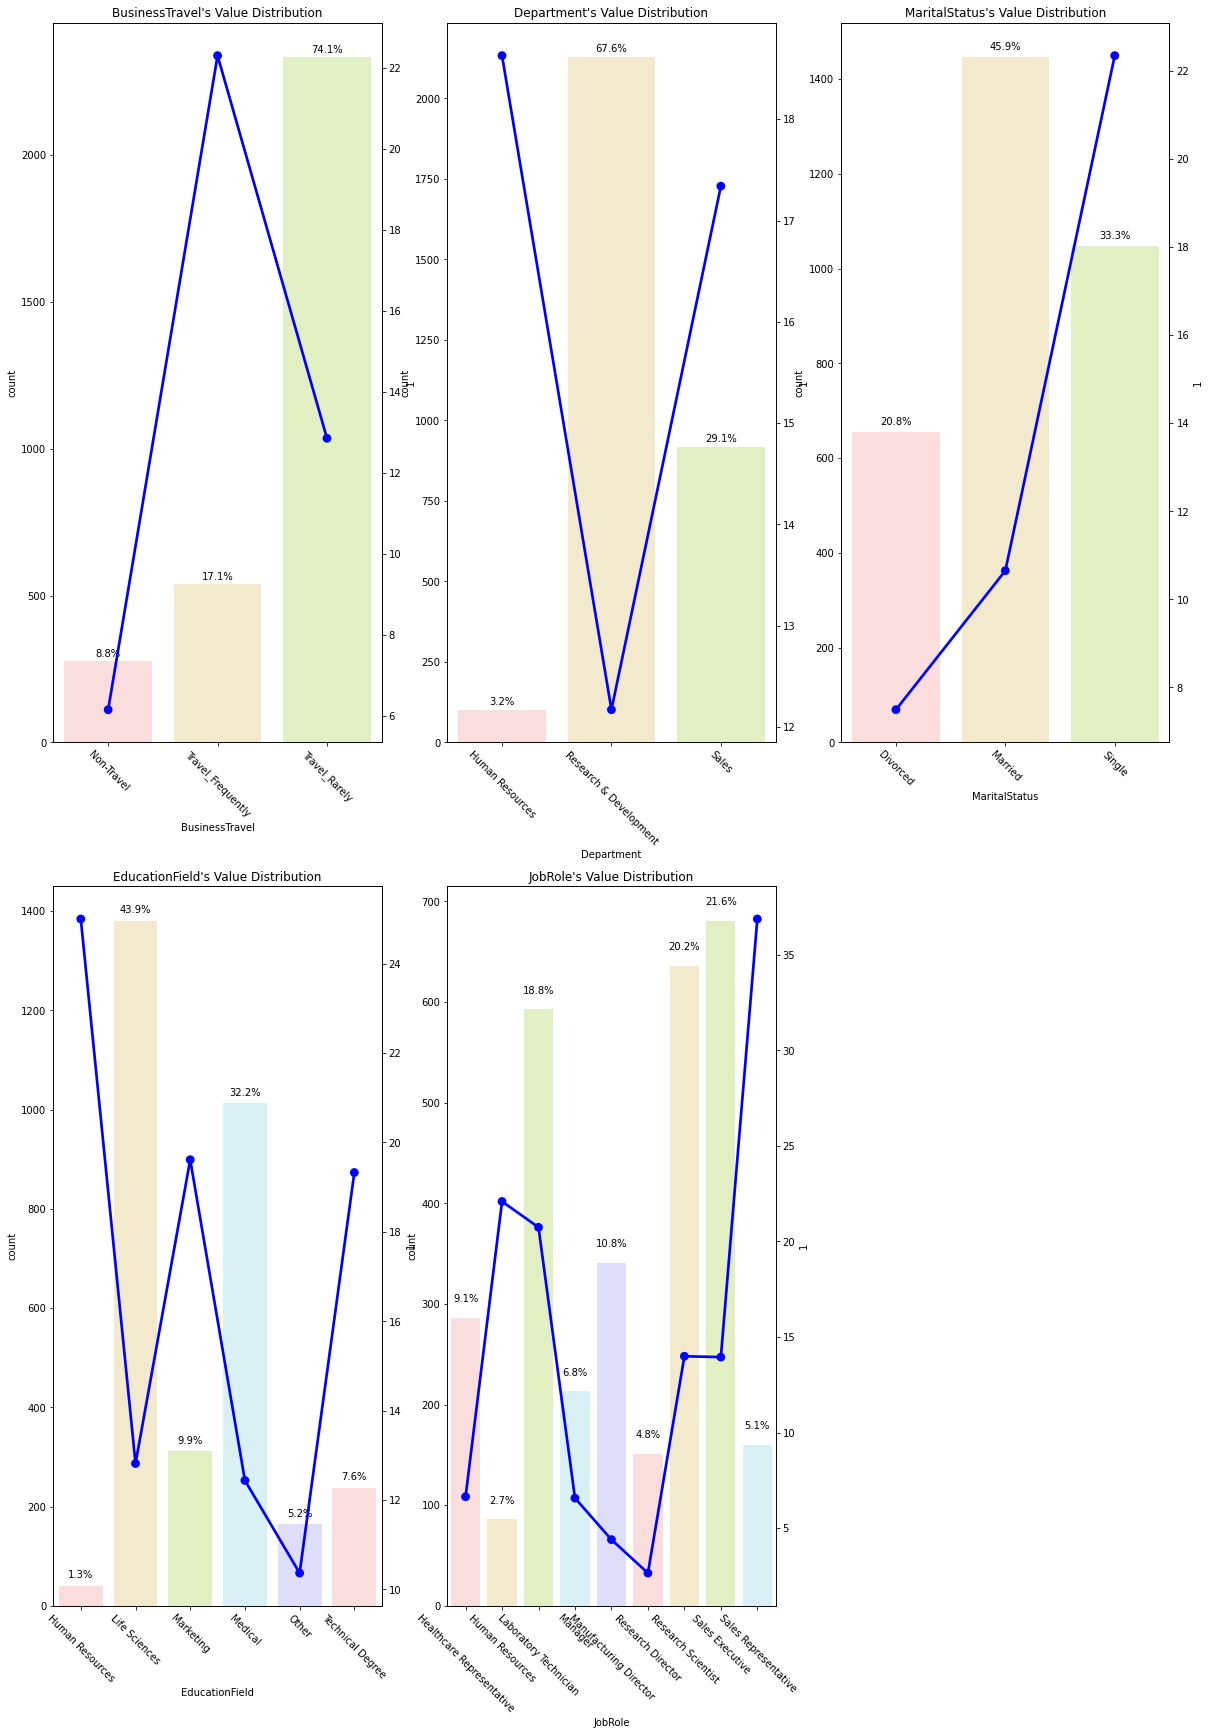

In [ ]:
import matplotlib.gridspec as gridspec

p_grid = gridspec.GridSpec(3, 3)

def show_count_point_plot( all_data, features, rows=3, cols=2, fig_size=(20, 45) ):
  plt.figure( figsize=fig_size )
  p_grid = gridspec.GridSpec(rows, cols)
  palette=['#FFD8D8',"#FAECC5", "#E4F7BA", "#D4F4FA", '#DAD9FF' ]

  for idx, feature in enumerate( features ):
    ax = plt.subplot( p_grid[idx] )
    cross_tab = make_cross_tab( all_data, feature )
    plt.xticks(rotation = - 45 )
    sns.countplot( data=all_data, x=feature, ax=ax, order=cross_tab[feature], palette=palette[:len(feature)] )
    show_text_perent_by_target( ax, all_data.shape[0] )
    ax.set_title(f'{ feature }\'s Value Distribution')
    show_pointplot( feature, cross_tab, 'blue', ax.twinx() )
  plt.show()  

show_count_point_plot( train, nom_datas, cols=3 )

# 구분이 잘 된다. 사용 가능!
# BusinessTrvel은 순서를 부여해도 될듯하다.

In [ ]:
train.BusinessTravel.unique()

array(['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'], dtype=object)

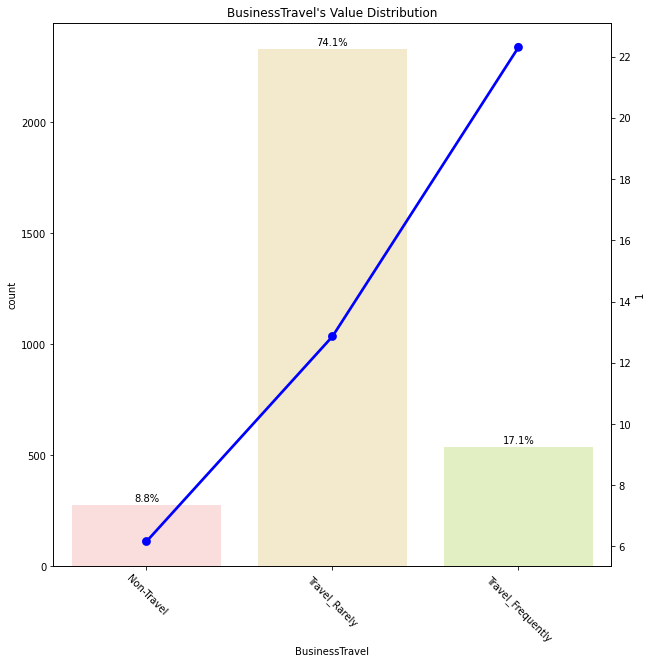

In [ ]:
# 피처 순서 지정 처리
from pandas.api.types import CategoricalDtype

# 새로 세팅한 순서
ord_1 = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']

# 순서생성
ord_1_dtype = CategoricalDtype(ord_1, True)

# 순서 적용 -> Dtype 적용
train['BusinessTravel'] = train['BusinessTravel'].astype(ord_1_dtype)

# 시각화
show_count_point_plot( train, ['BusinessTravel'], 1, 1, (10, 10) )
# 순서형 피처에 고유값 순서를 정확하게 적용해보니, 타겟값 1에 대한 비율의 증가가
# 순서에 맞춰서 비례한다는 것을 확인했음

### 시각화 분석 결과

- 'BusinessTravel' : 비즈니스 여행이 많을수록 퇴사율이 높다.
- 'Department' : 부서별 퇴사율은 인사과, 영업팀, 연구 개발 순으로 측정되며, 사람과 부딪히는 일들이 퇴사율이 높은 것을 알 수 있다.
- 'MaritalStatus' : 결혼 유무에 관하여 싱글은 퇴사율이 높은 것을 알 수 있으며, 기혼, 이혼들은 안정적인 직장을 원하는 것 같다.
- 'EducationField' : 더 나은 교육은 회사 기준에서 퇴사에 대한 안정성을 제공할 수 있다.
- 'JobRole' : 직무의 역할로는 영업사원이 가장 적은데 퇴사까지 많이한 상황인 것을 예측할 수 있다.
- One-Hot 인코딩을 사용하여 진행해보았지만, 결과 스코어는 더 떨어졌다.
- 사용 모델인 Catboost는 명목형 데이터에 대해 자동으로 변환을 해준다. 그 기능을 사용하여 진행하였더니, 결과 스코어가 더 올랐다.
- Catboost 자체 인코딩이 이 데이터에는 조금 더 잘 맞는 것 같다.

## 순서형 데이터

In [ ]:
ord_datas = ['EnvironmentSatisfaction', 'JobSatisfaction', 'JobLevel', 'RelationshipSatisfaction', 'StockOptionLevel', 'JobInvolvement', 'WorkLifeBalance']

train[ord_datas].head(5)

,EnvironmentSatisfaction,JobSatisfaction,JobLevel,RelationshipSatisfaction,StockOptionLevel,JobInvolvement,WorkLifeBalance
0,4,4,1,2,1,3,3
1,1,1,1,4,1,3,3
2,3,4,2,4,2,3,3
3,3,1,2,3,0,3,1
4,2,1,5,3,0,3,3


### 순서형 피쳐 시각화

0.6143308746048471 0.6429298067141404
0.6252609603340291 0.5588235294117648
0.585539714867617 0.6736842105263159
4.651877133105802 8.94
0.0789873417721519 2.5901060070671376
0.0746720484359233 2.53125


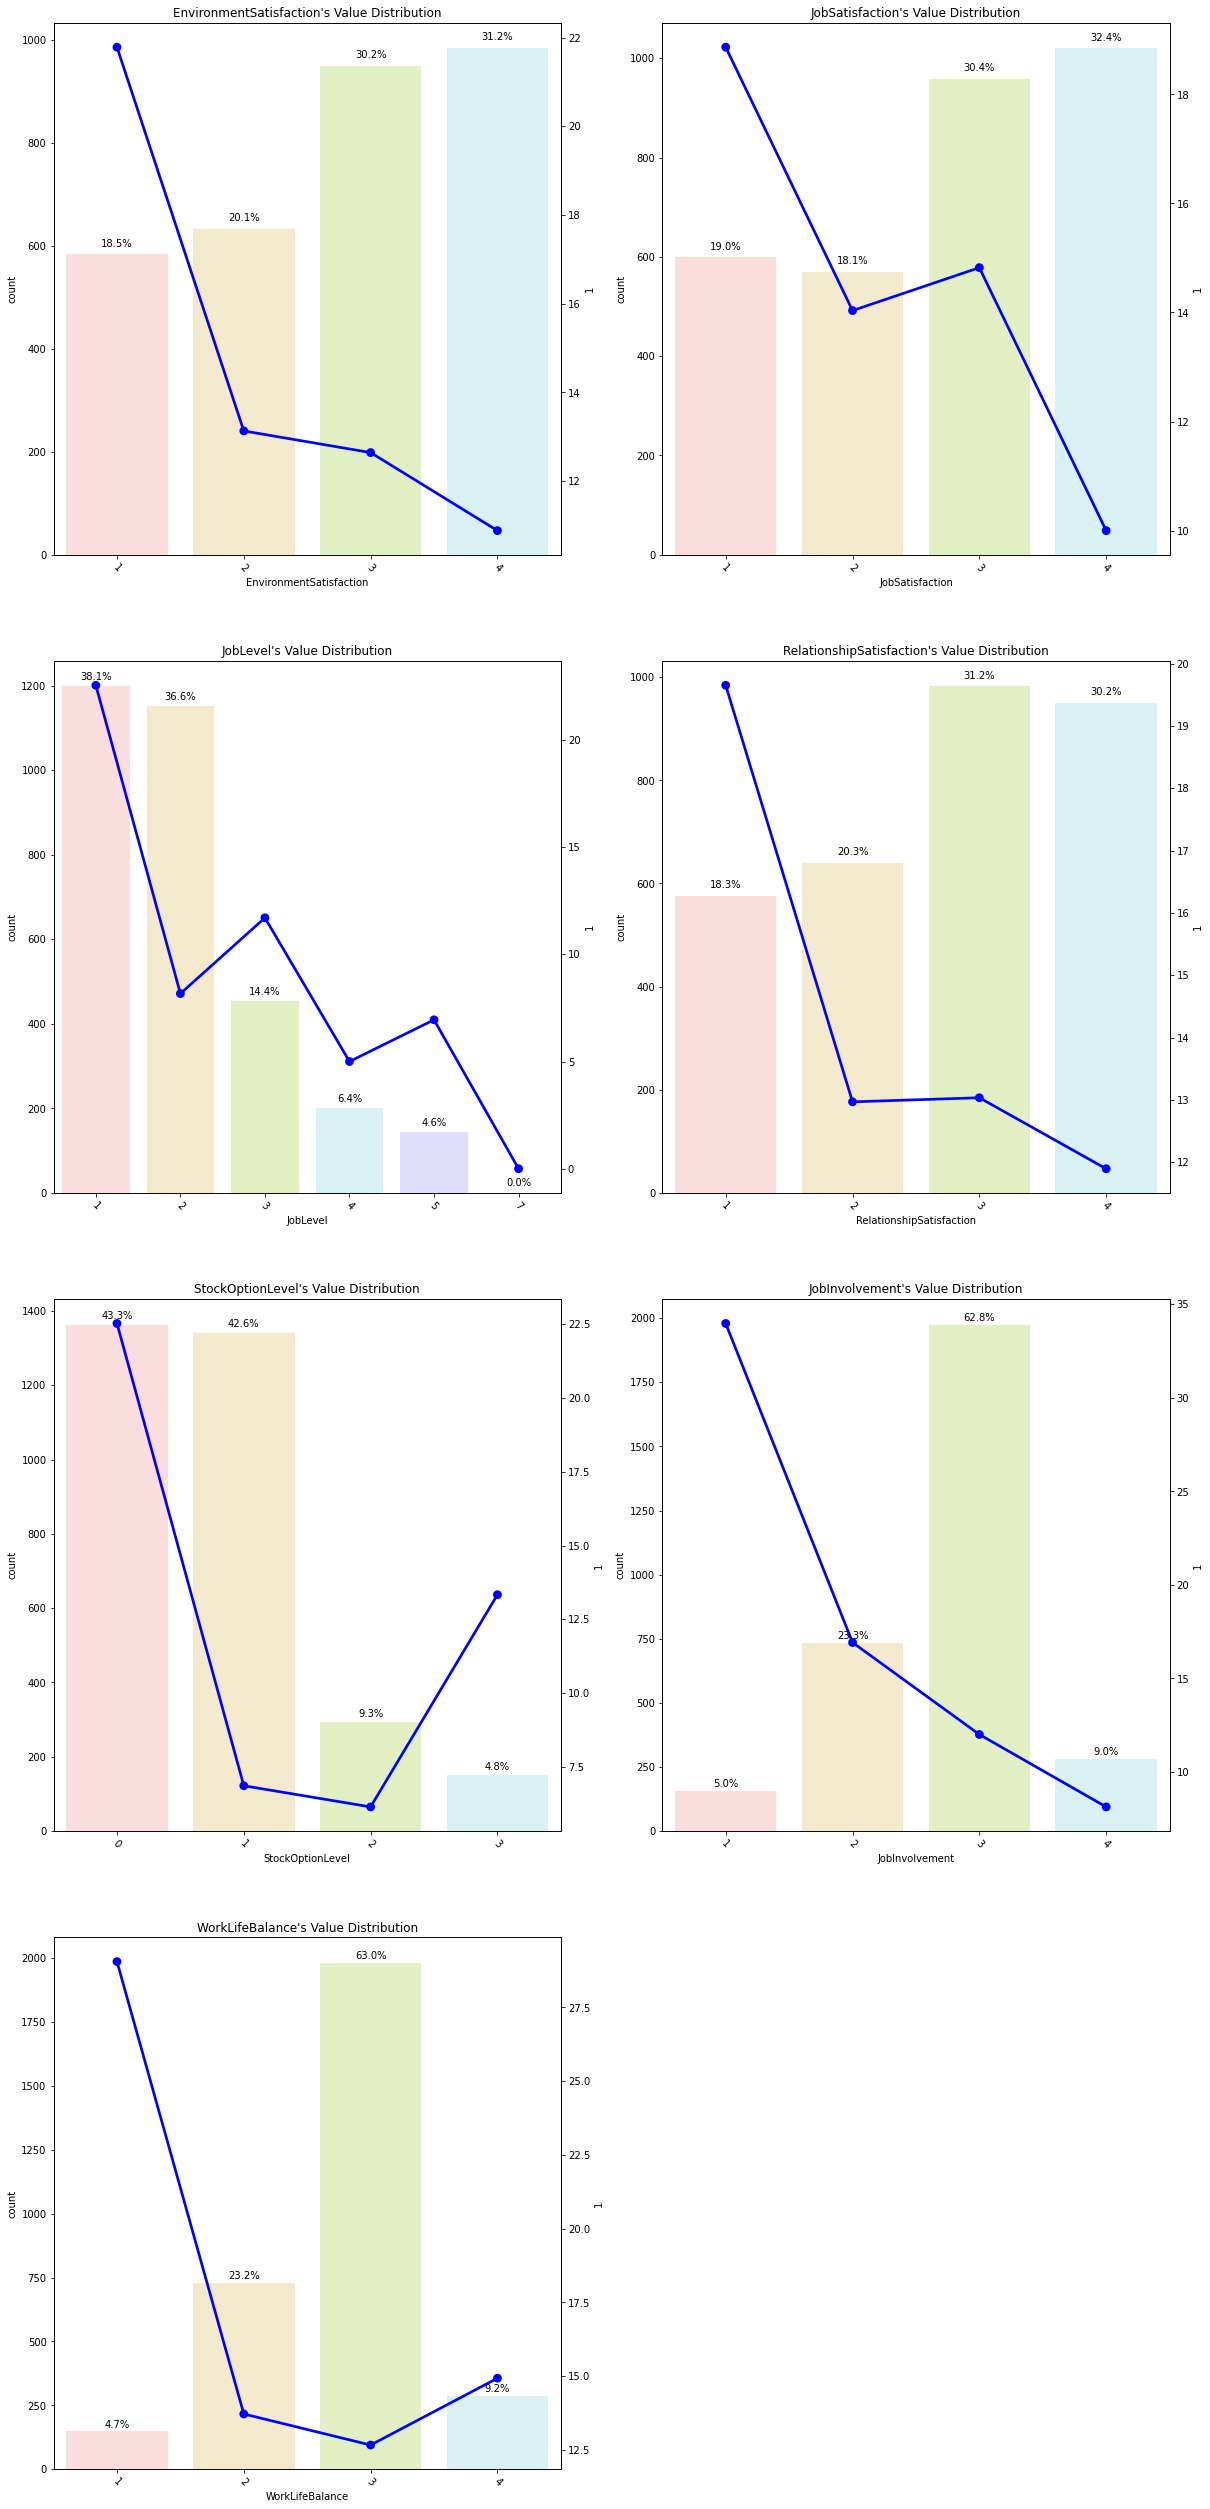

In [ ]:
ord_features = train[ord_datas]
show_count_point_plot( train, ord_features, 4, 2 )

In [ ]:
# 이상치 제거
train.drop(train[train['JobLevel']==7].index.tolist() , inplace=True, errors='ignore')

### 시각화 분석 결과

- 'EnvironmentSatisfaction' : 환경 만족도가 낮을수록 퇴사율이 높다.
- 'JobSatisfaction' : 직업 만족도가 낮을수록 퇴사율이 높다.
- 'JobLevel' : 직업 수준이 높을수록 퇴사율이 낮다.
- 'RelationshipSatisfaction' : 사람들끼리의 만족도가 높을수록 퇴사율이 낮다.
- 'StockOptionLevel' : 스톡옵션의 수준이 낮으면 퇴사율이 높다. 하지만 가장 높은 스톡옵션을 가지고 있는데 약간 높아지는 퇴사율을 보면 주식이 올랐나보다.
- 'JobInvolvement' : 직원들을 유지하기 위해서는 직무 참여도가 높아야 한다.
- 'WorkLifeBalance' : 일과 라이프 생활 즉, 취미와의 밸런스가 잘 맞아야 한다.
- 전체적으로 우하향 곡선을 그리고 있다.
- 피쳐들은 전체적으로 순서에 맞게 잘 정리가 되어있다.
- 인코딩은 진행하지 않음. -> 순서형 이전에 수치형이기 때문에 바로 스케일링 진행

## 수치형 데이터

In [ ]:
num_datas = ['Age','DailyRate','DistanceFromHome','Education', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', \
             'HourlyRate', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', \
             'YearsSinceLastPromotion', 'YearsWithCurrManager' ]
len(num_datas)

15

In [ ]:
summary_df_num_datas = summary_df.set_index('feature_name')

In [ ]:
summary_df_num_datas.loc[num_datas]

,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
feature_name,,,,,,
Age,int64,0,43,36,35,32
DailyRate,int64,0,901,599,921,718
DistanceFromHome,int64,0,29,24,8,26
Education,int64,0,6,3,3,3
MonthlyIncome,int64,0,1383,2596,2899,4627
MonthlyRate,int64,0,1447,5099,10778,16495
NumCompaniesWorked,int64,0,10,1,1,0
HourlyRate,int64,0,71,42,46,80
PercentSalaryHike,int64,0,15,13,17,17


In [ ]:
train.YearsAtCompany.unique()

array([10,  4,  3,  6, 31,  1, 16,  9,  2,  7,  5, 20, 13,  0,  8, 11, 19,
       33, 15, 12, 24, 17, 34, 18, 29, 21, 22, 14, 27, 26, 30, 37, 41, 25,
       40, 36, 32, 23])

In [ ]:
train.YearsSinceLastPromotion.unique()

array([ 7,  0,  1,  4,  2,  6,  3, 13,  5, 11, 15,  8,  9, 10, 14, 12])

In [ ]:
train.YearsWithCurrManager.unique()

array([ 8,  3,  2, 10,  0,  9,  7,  4,  1, 13, 12,  5,  6, 11, 17, 15, 16,
       14])

### 수치형 피쳐 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 상관 관계 체크
corr_values = train[num_datas+['Attrition']].corr()
corr_values

,Age,DailyRate,DistanceFromHome,Education,MonthlyIncome,MonthlyRate,NumCompaniesWorked,HourlyRate,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.018933,-0.024094,0.215021,0.484900,0.017860,0.300481,0.025411,-0.025987,0.664967,-0.002112,0.309387,0.216903,0.211651,0.201067,-0.156610
DailyRate,0.018933,1.000000,0.005927,-0.010244,0.013619,-0.018385,0.006939,0.016810,-0.003655,0.031542,-0.013347,0.014416,0.032589,-0.002014,0.009317,-0.046824
DistanceFromHome,-0.024094,0.005927,1.000000,0.003521,-0.038557,0.022928,-0.029523,0.016984,0.039830,-0.013484,-0.018064,-0.006932,0.006005,0.003784,0.013796,0.053439
Education,0.215021,-0.010244,0.003521,1.000000,0.087156,-0.007903,0.108053,0.016293,-0.019251,0.150166,-0.018676,0.093914,0.078122,0.051823,0.090912,-0.058574
MonthlyIncome,0.484900,0.013619,-0.038557,0.087156,1.000000,0.037326,0.128535,-0.017136,-0.067514,0.756969,-0.025193,0.525004,0.378034,0.363853,0.366778,-0.141206
MonthlyRate,0.017860,-0.018385,0.022928,-0.007903,0.037326,1.000000,-0.005424,-0.015977,0.024092,0.018683,0.014075,0.010586,0.016962,0.011342,-0.012223,0.003001
NumCompaniesWorked,0.300481,0.006939,-0.029523,0.108053,0.128535,-0.005424,1.000000,0.040715,-0.019940,0.231905,-0.031565,-0.119706,-0.105287,-0.046377,-0.114723,0.041613
HourlyRate,0.025411,0.016810,0.016984,0.016293,-0.017136,-0.015977,0.040715,1.000000,0.001182,-0.015605,0.014722,-0.042569,-0.045713,-0.046758,-0.048188,-0.024377
PercentSalaryHike,-0.025987,-0.003655,0.039830,-0.019251,-0.067514,0.024092,-0.019940,0.001182,1.000000,-0.047718,-0.005486,-0.053088,-0.020090,-0.042120,-0.033491,-0.019633
TotalWorkingYears,0.664967,0.031542,-0.013484,0.150166,0.756969,0.018683,0.231905,-0.015605,-0.047718,1.000000,-0.041409,0.639169,0.469499,0.414013,0.478620,-0.152659


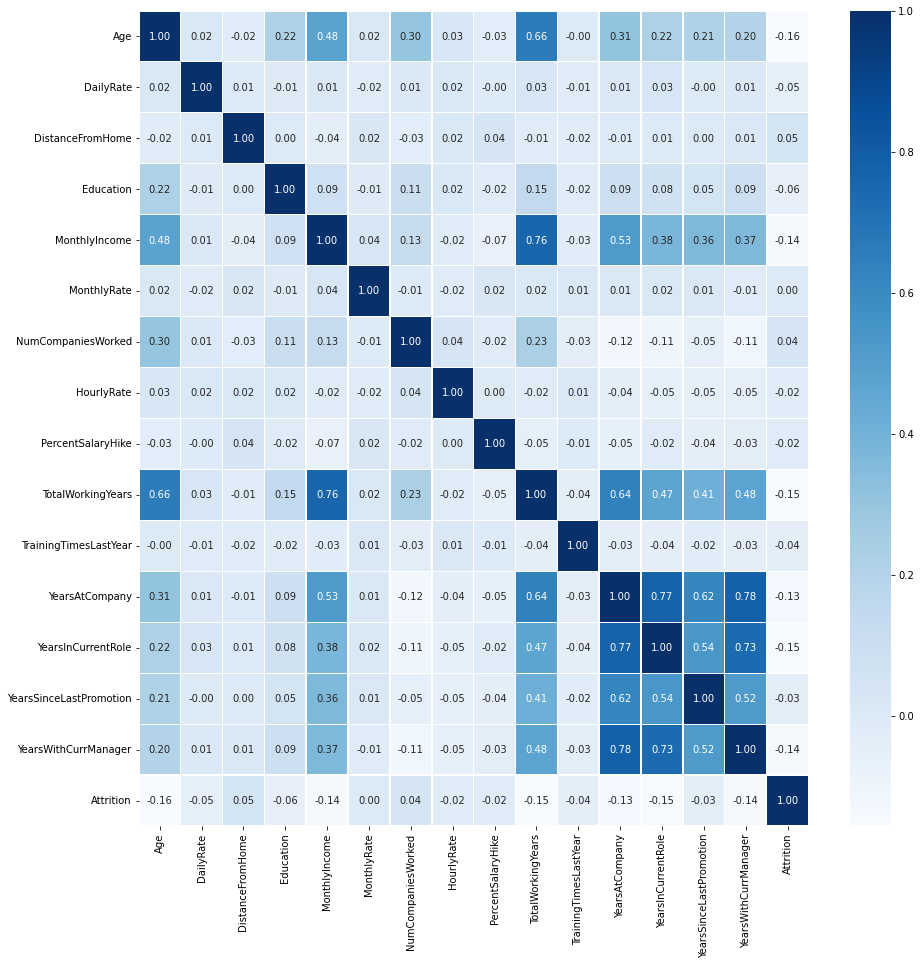

In [ ]:
# 히트맵 시각화
plt.figure(figsize=(15,15))
sns.heatmap( corr_values, annot=True,
fmt = '.2f', linewidths=.5, cmap='Blues');
plt.show()

# 수치형 데이터끼리 높은 상관관계는 없음
# Age랑 TotalWorkingYears는 0.65 로 상관이 있음
# TotalWorkingYears랑 MonthlyIncome 0.74로 상관이 있음
# TotalWorkingYears는 피쳐명에 Years가 앞에 붙음 피쳐들과 상관이 있음
# 피쳐명에 Years가 앞에 붙음 피쳐들끼리 상관관계에 놓여 있음
# => 총일한해수가 나이랑 수입, 해수와 관련된 피처들과 관련이 있다.

# 강한 상관관계는 없음
# 아래 히스토그램 시각화를 통해 분포를 비교해봄

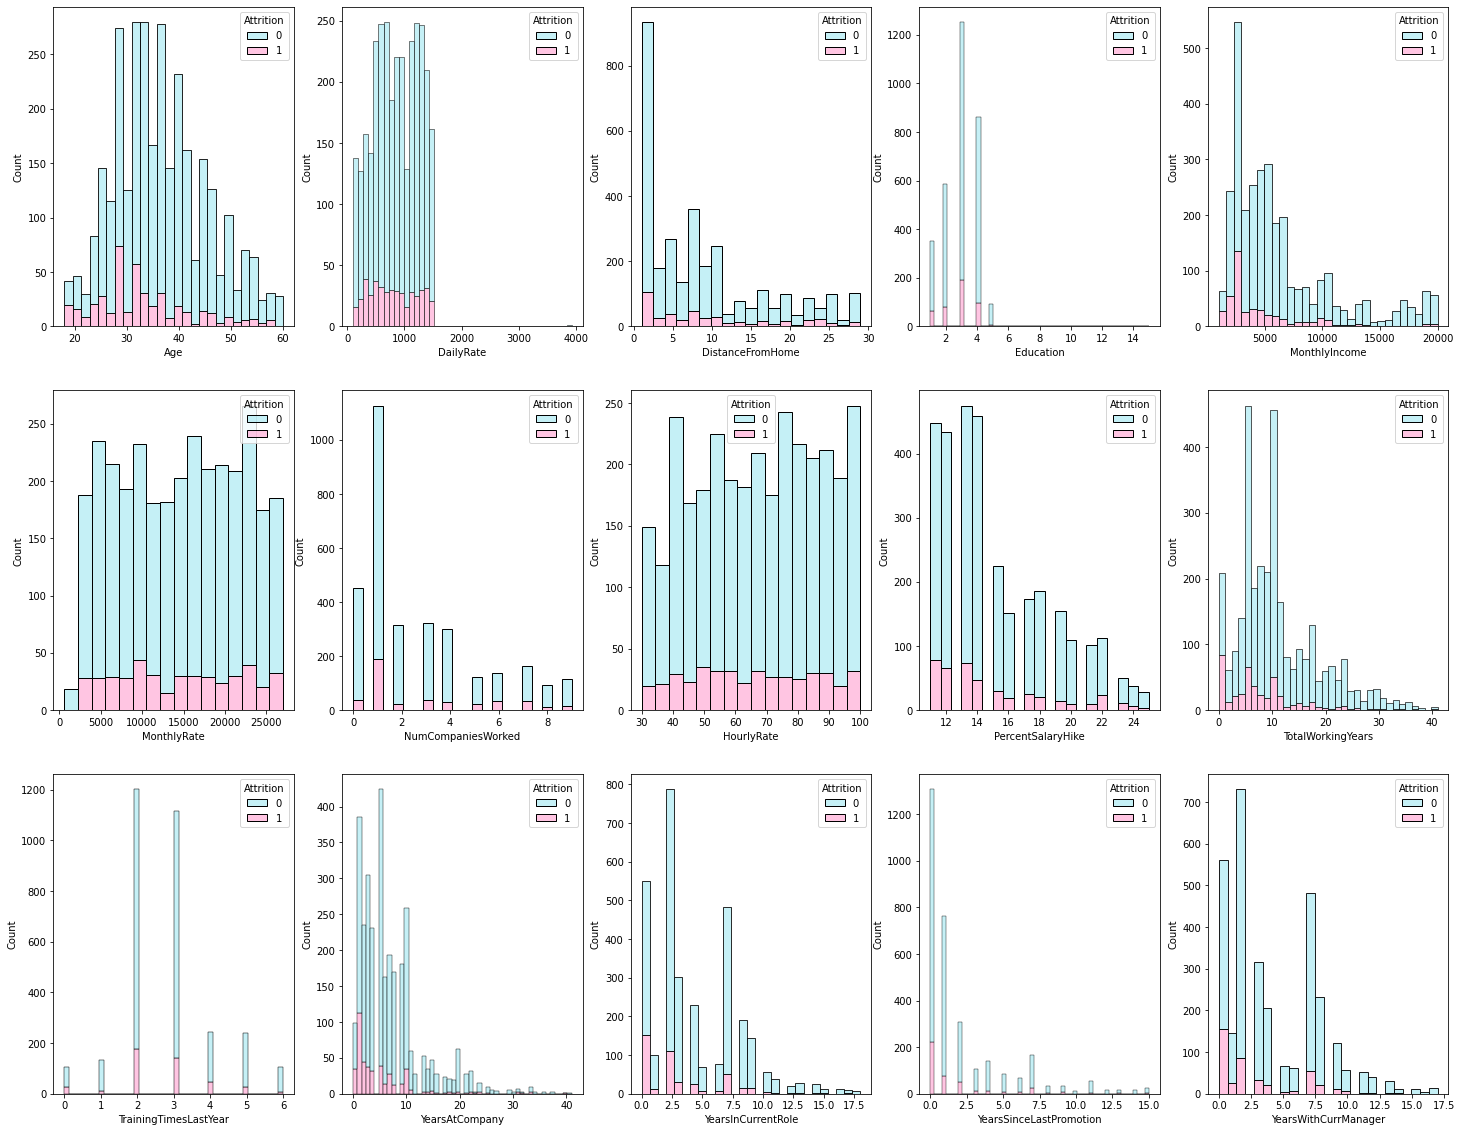

In [ ]:
# 히스토그램
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
i = 0
for row in range(3):
    for col in range(5):
        ax = axes[row][col]
        dept = num_datas[i]
        # print(dept)
        sns.histplot(data=train, x=dept, hue='Attrition', multiple='stack', ax=ax, palette=['#B2EBF4',"#FFB2D9"]);
        i += 1

# 히트맵에서 상관관계가 있어보인 피쳐들끼리 분포가 비슷해보이긴 함 
# (각 피처별로 고유값도 다르고 강한 상관관계는 아니였기에 그대로 피처 모두 사용해도 될듯함)
# Attrition 1보다 0이 압도적, 퇴사하지 않은 직원 데이터가 많음
# Age만 정규분포를 따르고 왼쪽으로 치우친 피처들이 많다 (로그 변환이 필요할 지도)

In [ ]:
# stroke는 1에 비해 0은 7.3배 많다
c0, c1 = np.unique(train.Attrition.values, return_counts=True)[1]
c0 / c1

6.19908466819222

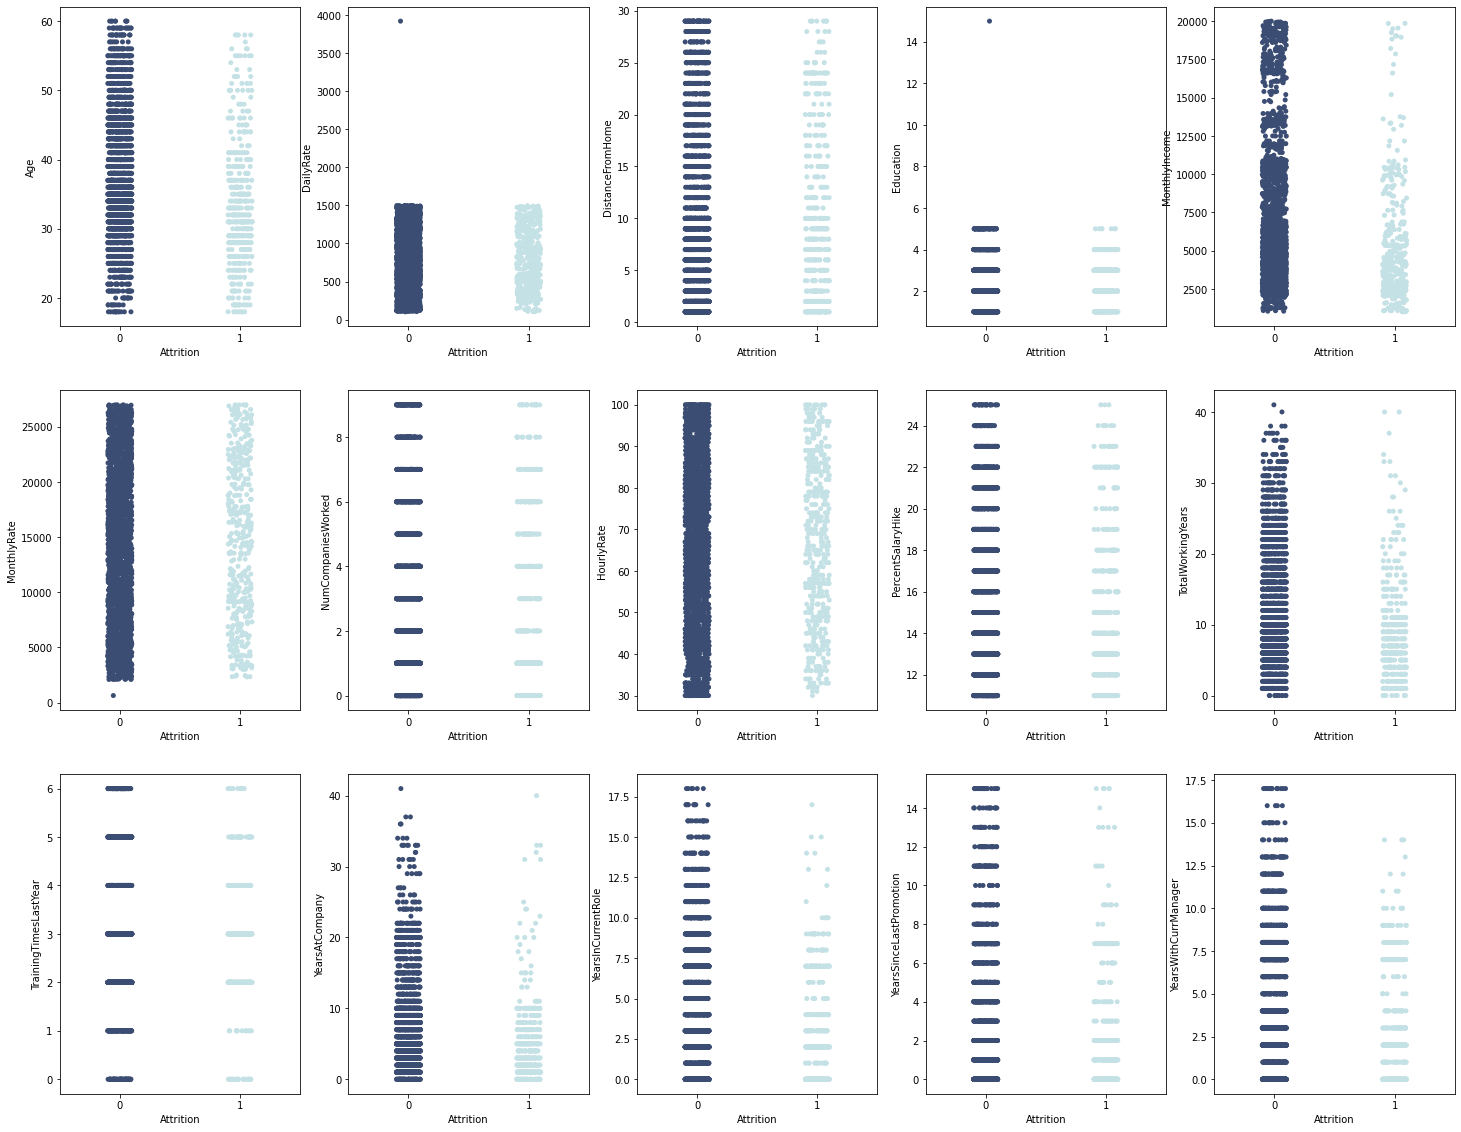

In [ ]:
# 산점도
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
i = 0
for row in range(3):
    for col in range(5):
        ax = axes[row][col]
        dept = num_datas[i]
        # print(dept)
        sns.stripplot(data=train , x='Attrition', y=dept, palette="ch:r=-.2,d=.3_r", ax=ax);
        i += 1

# DailyRate와 Education에 이상치 제거 필요해보임

In [ ]:
train.shape

(3146, 31)

In [ ]:
train[train.Education== 15]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
527,38,Travel_Rarely,548,Research & Development,1,15,Life Sciences,1,Female,72,...,1,1,7,2,3,5,2,1,4,0


In [ ]:
test[test.Education== 15]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
train[train['DailyRate'] > 3500]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1398,44,Travel_Frequently,3921,Research & Development,1,3,Life Sciences,4,Male,73,...,2,1,24,3,3,20,10,3,10,0


In [ ]:
test[test['DailyRate'] > 3500]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# DailyRate와 Education에 이상치 제거 (train만, test에는 해당 이상치 없음)
train.drop([527, 1398], inplace=True)

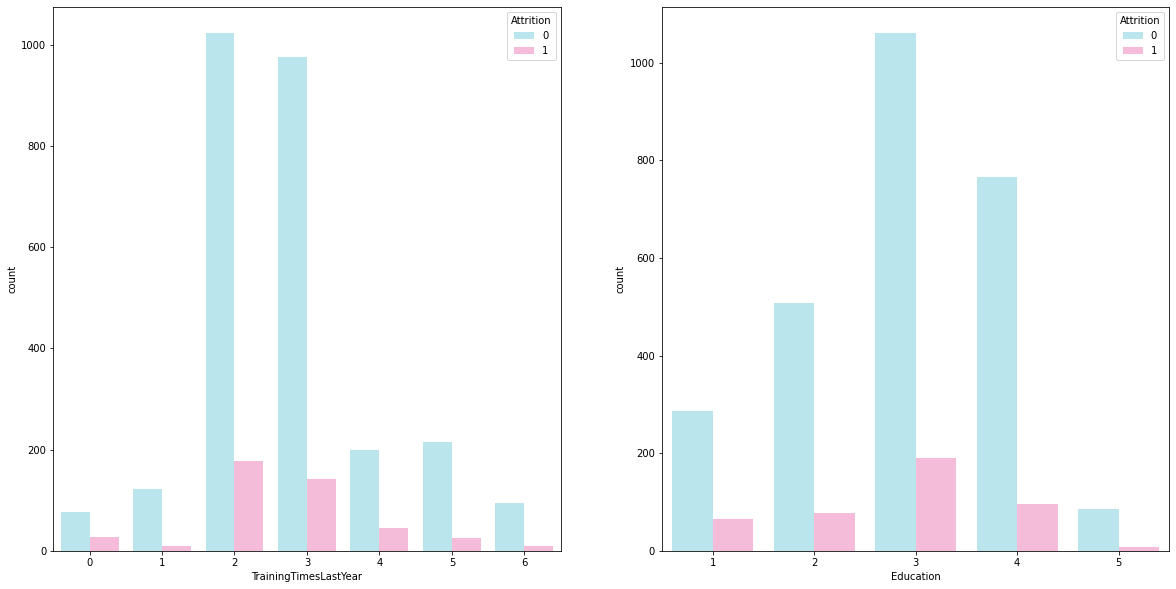

In [ ]:
# 고유값이 적은 TrainingTimesLastYear, Education의 countplot
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='TrainingTimesLastYear', hue='Attrition', palette=['#B2EBF4',"#FFB2D9"]);
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='Education', hue='Attrition', palette=['#B2EBF4',"#FFB2D9"]);
# 고유값별로 등장 빈도가 다르다 => 학습에 도움이 된다 (구분이 된다)
# 고유값에 따른 1과 0의 추세가 비슷하다

- 결론
    - 이상치 제거 (완료)
    - 일단 제거할 피처 없음
    - 수치형 데이터이므로 인코딩 없이 바로 스케일 진행

### 시각화 분석 결과
- 30대, 지난해 훈련시간 2-3시간, 회사에서 일한 기간 10년이하, 현재 업무는 4년 이하, 일한 회사 1개, 수입 5000이하, 집과 거리가 가까운 경우가 많음
- 총일한해수가 나이랑 수입, 년도와 관련된 피처들과 관련이 있다.

## 데이터 인코딩

### 이진형

- 'OverTime', 'Gender', 'PerformanceRating' 피쳐에 대해 인코딩 진행
- 이진형 데이터이기 때문에 0과 1로 변경

In [ ]:
bin_datas

['OverTime', 'Gender', 'PerformanceRating']

In [ ]:
train[bin_datas[0]] = train[bin_datas[0]].map({'Yes':1, 'No':0})
train[bin_datas[1]] = train[bin_datas[1]].map({'Male':1, 'Female':0})
train[bin_datas[2]] = train[bin_datas[2]].map({3:1, 4:0})

In [ ]:
test[bin_datas[0]] = test[bin_datas[0]].map({'Yes':1, 'No':0})
test[bin_datas[1]] = test[bin_datas[1]].map({'Male':1, 'Female':0})
test[bin_datas[2]] = test[bin_datas[2]].map({3:1, 4:0})

In [ ]:
train[bin_datas].head(5)

,OverTime,Gender,PerformanceRating
0,1,1,1
1,0,1,1
2,0,1,1
3,0,0,1
4,1,0,1


### 명목형

- 'BusinessTravel' 피쳐는 순서대로 지정을 해도 될 것 같다.
- 'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2 순서대로 인코딩
- 실제로 여행을 많이 간 순서대로 나열했더니, 결과 값이 올랐다.

In [ ]:
ord_1_dict = { 'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2 }

train['BusinessTravel'] = train['BusinessTravel'].map( ord_1_dict )
test['BusinessTravel'] = test['BusinessTravel'].map( ord_1_dict )

summary_feature_info( train[['BusinessTravel']] )

,feature_name,type,결측값수,고유값수,샘플값 0,샘플값 1,샘플값 2
0,BusinessTravel,category,0,3,2,1,1


In [ ]:
# category => int
train['BusinessTravel'] = train['BusinessTravel'].astype(int)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3144 entries, 0 to 3146
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       3144 non-null   int64 
 1   BusinessTravel            3144 non-null   int64 
 2   DailyRate                 3144 non-null   int64 
 3   Department                3144 non-null   object
 4   DistanceFromHome          3144 non-null   int64 
 5   Education                 3144 non-null   int64 
 6   EducationField            3144 non-null   object
 7   EnvironmentSatisfaction   3144 non-null   int64 
 8   Gender                    3144 non-null   int64 
 9   HourlyRate                3144 non-null   int64 
 10  JobInvolvement            3144 non-null   int64 
 11  JobLevel                  3144 non-null   int64 
 12  JobRole                   3144 non-null   object
 13  JobSatisfaction           3144 non-null   int64 
 14  MaritalStatus           

In [ ]:
test['BusinessTravel'] = test['BusinessTravel'].astype(int)

## 데이터 스케일링

- 순서형, 수치형 -> StandardScaler
- 학습 시 메모리를 적게 사용하기 위해 스케일링 진행
- 사용 모델에 따라 스케일링이 결과에 크게 영향을 미치지 않을수도 있다.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(train[ord_datas])
train[ord_datas] = scaler.transform(train[ord_datas])
test[ord_datas] = scaler.transform(test[ord_datas])

In [ ]:
scaler = StandardScaler().fit(train[num_datas])
train[num_datas] = scaler.transform(train[num_datas])
test[num_datas] = scaler.transform(test[num_datas])

In [ ]:
#scaler = StandardScaler().fit(train[add_datas])
#train[add_datas] = scaler.transform(train[add_datas])
#test[add_datas] = scaler.transform(test[add_datas])

In [ ]:
train.head(2).T

,0,1
Age,-0.051082,-0.164501
BusinessTravel,2,1
DailyRate,-0.647934,0.183973
Department,Research & Development,Sales
DistanceFromHome,1.893264,-0.116501
Education,0.076865,0.076865
EducationField,Medical,Other
EnvironmentSatisfaction,1.156127,-1.598252
Gender,1,1
HourlyRate,-1.252502,-1.051244


In [ ]:
test.head(2).T

id,1677,1678
Age,-1.97921,0.969692
BusinessTravel,0,1
DailyRate,0.367405,0.739438
Department,Research & Development,Sales
DistanceFromHome,-0.995773,-0.618942
Education,-1.903991,1.067293
EducationField,Medical,Marketing
EnvironmentSatisfaction,1.156127,0.238
Gender,1,1
HourlyRate,-1.202188,0.005361


# 베이스라인 모델 구축 및 성능향상

In [ ]:
%pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,  StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import *

## 모델 학습 시도 방식

- LogisticRegression으로 베이스라인을 구축하여 시도해봄
- 원-핫 인코딩, MinMaxScaler 전처리된 데이터를 이용하여 xgboost, lgbm, catboost를 시도해봄
- 결과적으로 원-핫 인코딩 X, StandardScaler 전처리된 데이터를 이용하여 catboost를 진행한 다음 결과가 우수하다.

## CatBoost

### 기본 모델 학습 진행

- 파라미터 튜닝 X

In [ ]:
# catboost 설치 및 scikit-learn 업데이트
%pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
# object형 변수는 cat_features에 추가
cat_features = [f for f in train.columns if train[f].dtype == 'object']
print(cat_features)

['Department', 'EducationField', 'JobRole', 'MaritalStatus']


In [ ]:
X = train.drop('Attrition', axis=1)
y = train['Attrition']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, stratify=y, random_state=0 )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2672, 30), (472, 30), (2672,), (472,))

In [ ]:
pool_train = Pool(X_train, y_train, cat_features=cat_features)
pool_test = Pool(X_test, y_test, cat_features=cat_features)

In [ ]:
cat = CatBoostClassifier()
cat.fit(pool_train, eval_set=pool_test, use_best_model=True)
'''
bestTest = 0.2862302448
bestIteration = 257
'''

Learning rate set to 0.040396
0:	learn: 0.6571539	test: 0.6585962	best: 0.6585962 (0)	total: 106ms	remaining: 1m 45s
1:	learn: 0.6291399	test: 0.6313295	best: 0.6313295 (1)	total: 135ms	remaining: 1m 7s
2:	learn: 0.6010895	test: 0.6034795	best: 0.6034795 (2)	total: 161ms	remaining: 53.4s
3:	learn: 0.5770158	test: 0.5799472	best: 0.5799472 (3)	total: 199ms	remaining: 49.7s
4:	learn: 0.5550451	test: 0.5594509	best: 0.5594509 (4)	total: 247ms	remaining: 49.2s
5:	learn: 0.5322778	test: 0.5376007	best: 0.5376007 (5)	total: 281ms	remaining: 46.6s
6:	learn: 0.5109766	test: 0.5169338	best: 0.5169338 (6)	total: 305ms	remaining: 43.3s
7:	learn: 0.4924293	test: 0.4997555	best: 0.4997555 (7)	total: 352ms	remaining: 43.7s
8:	learn: 0.4755435	test: 0.4846102	best: 0.4846102 (8)	total: 390ms	remaining: 42.9s
9:	learn: 0.4599693	test: 0.4699977	best: 0.4699977 (9)	total: 424ms	remaining: 41.9s
10:	learn: 0.4480019	test: 0.4588195	best: 0.4588195 (10)	total: 462ms	remaining: 41.6s
11:	learn: 0.4361900	

In [ ]:
# 예측
cat_preds = cat.predict_proba( test )[:, 1]
# 파일 저장
submission['Attrition'] = cat_preds 
submission.to_csv('submission_ver_catboost.csv')
# 0.89148

### 파라미터 추가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, shuffle=True)

pool_train = Pool(X_train,y_train,cat_features=cat_features)
pool_test = Pool(X_test,y_test,cat_features=cat_features)

clf_pram = {
    'learning_rate':0.1,
    'random_seed' : 7,
    'iterations':200,
    'loss_function':'Logloss',
    'depth':2,
    'subsample':0.9,
    'verbose':100
}
cat = CatBoostClassifier(**clf_pram)
cat.fit(pool_train, eval_set=pool_test, use_best_model=True)

0:	learn: 0.6314226	test: 0.6291841	best: 0.6291841 (0)	total: 7.74ms	remaining: 1.54s
100:	learn: 0.2849300	test: 0.2810908	best: 0.2810908 (100)	total: 1.02s	remaining: 1s
199:	learn: 0.2520979	test: 0.2692865	best: 0.2692865 (199)	total: 2.07s	remaining: 0us

bestTest = 0.2692864846
bestIteration = 199



In [ ]:
# 예측
cat_preds = cat.predict_proba( test )[:, 1]
# 파일 저장
submission['Attrition'] = cat_preds 
submission.to_csv('submission_ver_catboost_best.csv')

# private_score : 0.89649, 0.93697 => 아주 조금 더 올릴필요가 있음 (거의 10%)

### 하이퍼 파라미터 튜닝

- 점수가 올라간 과정
- 직접 손으로 하나하나 수정해가면서 채점 진행

In [ ]:
# 파라미터를 좀 더 설정해줌
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, shuffle=True)

pool_train = Pool(X_train,y_train,cat_features=cat_features)
pool_test = Pool(X_test,y_test,cat_features=cat_features)

clf_pram = {
    'learning_rate':0.1,
    'random_seed' : 7,
    'iterations':200,
    'loss_function':'Logloss',
    'depth':2,
    'subsample':0.9,
    'verbose':100,
    'bootstrap_type' : 'Bernoulli', 
    'l2_leaf_reg' : 7
}
cat = CatBoostClassifier(**clf_pram)
cat.fit(pool_train, eval_set=pool_test, use_best_model=True)

0:	learn: 0.6235548	test: 0.6224870	best: 0.6224870 (0)	total: 5.26ms	remaining: 1.05s
100:	learn: 0.2873331	test: 0.2778950	best: 0.2778950 (100)	total: 1.2s	remaining: 1.18s
199:	learn: 0.2560014	test: 0.2652469	best: 0.2651140 (196)	total: 2.22s	remaining: 0us

bestTest = 0.265114044
bestIteration = 196

Shrink model to first 197 iterations.


In [ ]:
# 성능평가
roc_auc_score(y_test, cat.predict_proba( X_test )[:, 1])

0.8846004579500911

In [ ]:
# 예측
cat_preds = cat.predict_proba( test )[:, 1]
# 파일 저장
submission['Attrition'] = cat_preds 
submission.to_csv('submission_ver_catboost_best1.csv')

# Score: 0.899 => 28등
# Public score: 0.9407



---



In [ ]:
X = train.drop('Attrition', axis=1)
y = train['Attrition']

# 파라미터를 좀 더 설정해줌, test_size 변경 (↓)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0, shuffle=True)

pool_train = Pool(X_train,y_train,cat_features=cat_features)
pool_test = Pool(X_test,y_test,cat_features=cat_features)

clf_pram = {
    'learning_rate':0.112,
    'random_seed' : 7,
    'iterations':231,
    'loss_function':'Logloss',
    'depth':2,
    'subsample':0.83,
    'verbose':100,
    'bootstrap_type' : 'Bernoulli', 
    'l2_leaf_reg' : 5,
}
cat = CatBoostClassifier(**clf_pram)
cat.fit(pool_train, eval_set=pool_test, use_best_model=True)

0:	learn: 0.6232853	test: 0.6233166	best: 0.6233166 (0)	total: 11.6ms	remaining: 2.68s
100:	learn: 0.2781752	test: 0.2800505	best: 0.2799326 (98)	total: 986ms	remaining: 1.27s
200:	learn: 0.2481224	test: 0.2688219	best: 0.2687328 (188)	total: 1.81s	remaining: 271ms
230:	learn: 0.2413454	test: 0.2681148	best: 0.2674270 (227)	total: 2.03s	remaining: 0us

bestTest = 0.2674269512
bestIteration = 227

Shrink model to first 228 iterations.


In [ ]:
# 성능평가
roc_auc_score(y_test, cat.predict_proba( X_test )[:, 1])

0.904729956390473

In [ ]:
# 예측
cat_preds = cat.predict_proba( test )[:, 1]
# 파일 저장
submission['Attrition'] = cat_preds 
submission.to_csv('submission_ver_catboost_best2.csv')

# Score: 0.89903 => 27등
# Public score: 0.93775



---



In [ ]:
# 다른 파라미터 시도

X = train.drop('Attrition', axis=1)
y = train['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0, shuffle=True)

pool_train = Pool(X_train,y_train,cat_features=cat_features)
pool_test = Pool(X_test,y_test,cat_features=cat_features)

clf_pram = {
    'learning_rate':0.181,
    'random_seed' : 7,
    'iterations':250,
    'loss_function':'Logloss',
    'depth':2,
    'subsample':0.9,
    'verbose':100,
    'bootstrap_type' : 'Bernoulli', 
    'l2_leaf_reg' : 7
}
cat = CatBoostClassifier(**clf_pram)
cat.fit(pool_train, eval_set=pool_test, use_best_model=True)
cat.best_score_

0:	learn: 0.5855689	test: 0.5856901	best: 0.5856901 (0)	total: 4.93ms	remaining: 1.23s
100:	learn: 0.2578845	test: 0.2721200	best: 0.2721200 (100)	total: 772ms	remaining: 1.14s
200:	learn: 0.2270960	test: 0.2692012	best: 0.2660384 (183)	total: 1.63s	remaining: 398ms
249:	learn: 0.2154417	test: 0.2695749	best: 0.2660384 (183)	total: 1.99s	remaining: 0us

bestTest = 0.2660384122
bestIteration = 183

Shrink model to first 184 iterations.


{'learn': {'Logloss': 0.21544171510291169},
 'validation': {'Logloss': 0.2660384122476933}}

In [ ]:
cat_pred = cat.predict_proba( X_test )[:, 1]
cat_pred

# 성능평가
print(roc_auc_score(y_test, cat_pred))

# 예측 후 평가까지 진행
cat.score(X_test, y_test)

#0.904729956390473
#0.8761904761904762

0.9004528681650452


0.8793650793650793

In [ ]:
# 예측
cat_preds = cat.predict_proba( test )[:, 1]
# 파일 저장
submission['Attrition'] = cat_preds 
submission.to_csv('submission_ver_catboost_best3.csv')

# 0.8993 => 26등
# 0.93681



---



In [ ]:
# 다른 파라미터 시도
X = train.drop('Attrition', axis=1)
y = train['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0, shuffle=True)

pool_train = Pool(X_train,y_train,cat_features=cat_features)
pool_test = Pool(X_test,y_test,cat_features=cat_features)

clf_pram = {
    'learning_rate':0.1835,
    'random_seed' : 7,
    'iterations':210,
    'loss_function':'Logloss',
    'depth':2,
    'subsample':0.9,
    'verbose':100,
    'bootstrap_type' : 'Bernoulli', 
    'l2_leaf_reg' : 7
}
cat = CatBoostClassifier(**clf_pram)
cat.fit(pool_train, eval_set=pool_test, use_best_model=True)
cat.best_score_

0:	learn: 0.5842787	test: 0.5844041	best: 0.5844041 (0)	total: 4.15ms	remaining: 867ms
100:	learn: 0.2558253	test: 0.2706894	best: 0.2693464 (65)	total: 656ms	remaining: 708ms
200:	learn: 0.2232647	test: 0.2612080	best: 0.2612080 (200)	total: 1.03s	remaining: 46ms
209:	learn: 0.2211011	test: 0.2636307	best: 0.2611995 (201)	total: 1.06s	remaining: 0us

bestTest = 0.2611995129
bestIteration = 201

Shrink model to first 202 iterations.


{'learn': {'Logloss': 0.2211011435604457},
 'validation': {'Logloss': 0.2611995128795804}}

In [ ]:
cat_pred = cat.predict_proba( X_test )[:, 1]
cat_pred

# 성능평가
print(roc_auc_score(y_test, cat_pred))

# 예측 후 평가까지 진행
cat.score(X_test, y_test)

# 0.9004528681650452
# 0.8793650793650793

0.8992787655149279


0.873015873015873

In [ ]:
# 예측
cat_preds = cat.predict_proba( test )[:, 1]
# 파일 저장
submission['Attrition'] = cat_preds 
submission.to_csv('submission_ver_catboost_best4.csv')

# 0.8996 => 18등
# 0.93899



---



# 예측 결과 최종 제출

- 최적의 파라미터 도출

In [ ]:
X = train.drop('Attrition', axis=1)
y = train['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0, shuffle=True)

pool_train = Pool(X_train,y_train,cat_features=cat_features)
pool_test = Pool(X_test,y_test,cat_features=cat_features)

clf_pram = {
    'learning_rate':0.1835,
    'random_seed' : 7,
    'iterations':200,
    'loss_function':'Logloss',
    'depth':2,
    'subsample':0.89,
    'verbose':100,
    'bootstrap_type' : 'Bernoulli', 
    'l2_leaf_reg' : 7
}
cat = CatBoostClassifier(**clf_pram)
cat.fit(pool_train, eval_set=pool_test, use_best_model=True)
cat.best_score_

0:	learn: 0.5773295	test: 0.5772527	best: 0.5772527 (0)	total: 17.7ms	remaining: 3.52s
100:	learn: 0.2546719	test: 0.2774753	best: 0.2749898 (94)	total: 964ms	remaining: 945ms
199:	learn: 0.2257195	test: 0.2747246	best: 0.2736613 (156)	total: 1.7s	remaining: 0us

bestTest = 0.2736612832
bestIteration = 156

Shrink model to first 157 iterations.


{'learn': {'Logloss': 0.22571946275945687},
 'validation': {'Logloss': 0.27366128320920613}}

In [ ]:
cat_pred = cat.predict_proba( X_test )[:, 1]
cat_pred

# 성능평가
print(roc_auc_score(y_test, cat_pred))

# 예측 후 평가까지 진행
cat.score(X_test, y_test)

# 0.8992787655149279
# 0.873015873015873

0.899762550881954


0.8814102564102564

In [ ]:
# 예측
cat_preds = cat.predict_proba( test )[:, 1]
# 파일 저장
submission['Attrition'] = cat_preds 
submission.to_csv('submission_ver_catboost_best_last.csv')

# 0.90037 => 12등
# 0.94195

# 추가로 blending 진행
[Project3_Blending_추가.ipynb](https://colab.research.google.com/drive/1fTY6mCN_nmcXGrtjNN1Ytsx0ZIZtLPDJ#scrollTo=9hd3CeNUxwOZ)
